In [1]:
import math
import matplotlib.pyplot as plt
import gprsim
import numpy as np

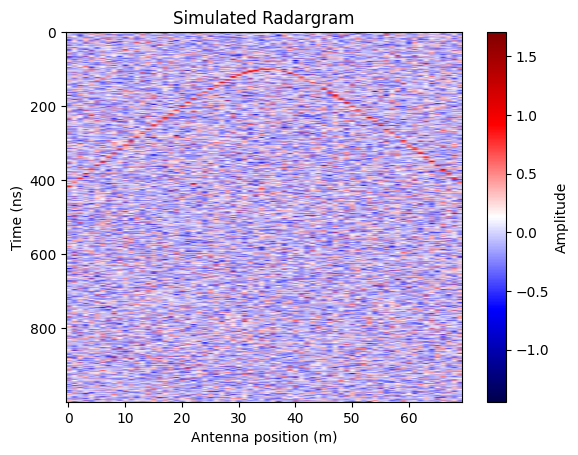

In [2]:
# Parameters
eps_r = 3                  # relative dielectric permittivity
rf = 400e6                 # radar frequency different from pulse frequency
dt = 1e-9                  # seconds
dx = 1                     # meters
region_shape = (70, 1e-6)  # grid (x,z)
SNR = 0.03
wavetype = 'gaussian'

# Point reflectors at (x,t) where x [m] and t [s]
reflectors = [(35, 50e-9)]

data, x_positions, t_samples = gprsim.gprsim(eps_r, rf, dt, dx, reflectors, region_shape, wavetype, SNR)

plt.imshow(data, aspect='auto', cmap='seismic')
plt.xlabel("Antenna position (m)")
plt.ylabel("Time (ns)")
plt.title("Simulated Radargram")
plt.colorbar(label="Amplitude")
plt.show()

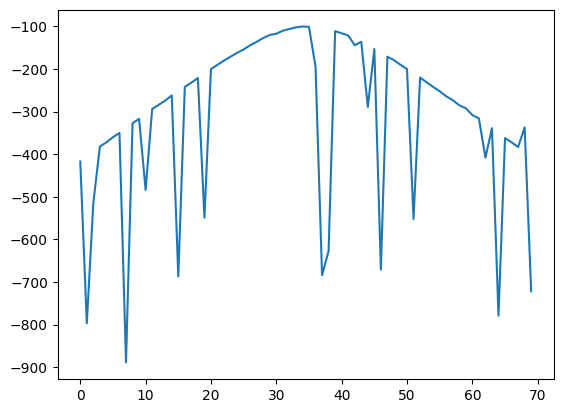

In [3]:
t = data.argmax(axis=0)* -1 # There are some issues here, will fix later
x = np.arange(0, data.shape[1]) * dx #
plt.plot(x, t)

In [4]:
v, z, x0, t0 = gprsim.fit_hyperbola(data, 1, 'fit_from_max', dx, dt)
# print(f"np.polyfit v error: {(3e8/np.sqrt(eps_r))-v}, t0 err: {reflectors[0][1]-t0}, x0 err: {reflectors[0][0]-x0}")
v, z, x0, t0 = gprsim.fit_hyperbola(data, 1, 'robust_fit', dx, dt)
# print(f"np.polyfit v error: {(3e8/np.sqrt(eps_r))-v}, t0 err: {reflectors[0][1]-t0}, x0 err: {reflectors[0][0]-x0}")

v = 143574302.0 m/s, depth z = 16.07 m, apex x0 = 34.000 m, t0 = 5.0000000000000004e-08 s
[1.23366939e-03 3.54737474e+01 1.07533000e+03]
v = 70247260.1 m/s, depth z = nan m, apex x0 = 35.474 m, t0 = nan s, risiduals=[-760.36195622 -255.73108319 -539.82064612 -587.01963316 -531.554829
 -479.26585258 -427.3851608   260.43027988 -330.91964526 -284.41512205
 -107.38706299 -198.51479422 -157.38643958 -118.06904511  -81.5569603
  340.25708859  -11.90135629   20.21000546   50.09168382  321.40278434
  104.91838957  129.82371859  152.91808745  174.52380904  194.28265289
  212.48479514  228.25970737  242.73406697  255.08838628  266.04574264
  275.96531172  283.05499596  288.82994958  292.63514957  294.84489479
  295.62648549  320.14962958  723.38480935  647.34451887  279.99673036
  271.66113706  261.37280372  253.72539815  236.19975775  280.25293751
  204.02673247  586.05957756  164.7223452   141.96050847  118.38867745
   92.66655978  311.45615866   35.7894439     5.07018251  -27.42034069
  -62.

/Users/coltenrodriguez/Desktop/GPR-modeling/Simulating-GPR/gprsim.py:239: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(gamma - x0**2)


Text(0.5, 1.0, 'c-10%')

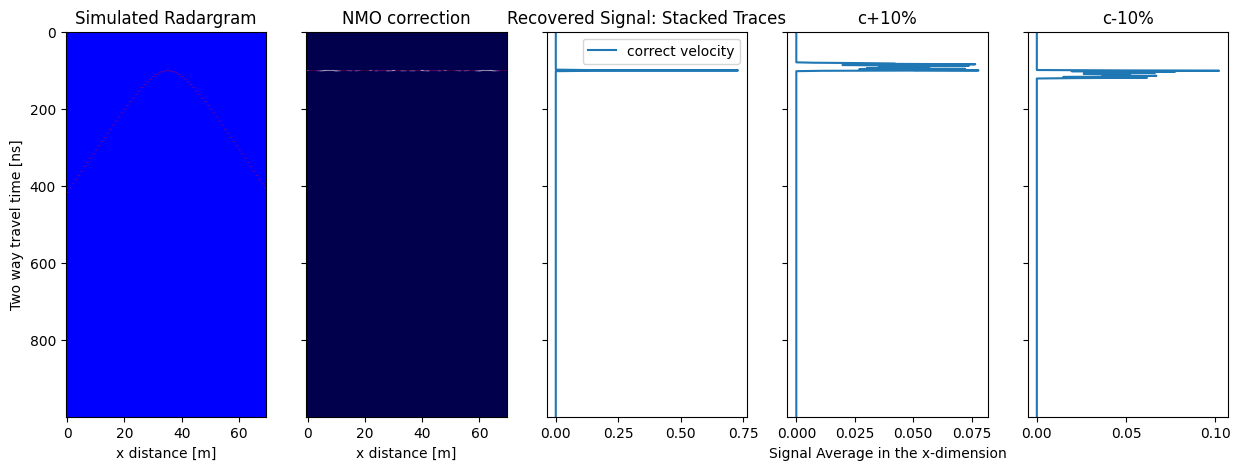

In [5]:
import numpy as np

stackh = lambda array : np.sum(array, axis=1)/array.shape[1]

t_0, x_0 = 100, 35 # The zero-offset time [ns] and 'CMP' [m] (the position of the reflector which we assume we know -- though can be estimated pretty easily)
eps_r = 3.0
wavetype = 'spike'
SNR = math.inf

data, x_positions, t_samples = gprsim.gprsim(eps_r, rf, dt, dx, reflectors, region_shape, wavetype, SNR)
corrected = gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt) 


fig, axs = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
plt.gca()
axs[0].imshow(data, aspect='auto', cmap='seismic')
im = axs[1].imshow(corrected, aspect='auto', cmap='seismic')
stack = stackh(corrected)
axs[2].plot(stack, range(0,len(stack)), label='correct velocity')


eps_r = 3.3
stack = stackh(gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt))
axs[3].plot(stack, range(0,len(stack)), label='velocity+10%')


eps_r = 2.7
stack = stackh(gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt))
axs[4].plot(stack, range(0,len(stack)), label='velocity-10%')


'''Desktop/ResolutionGuyotProj/Code/Point_Counting/Matrix_indev/Kmask/RoPeR_prcs/GPR_modeling
Making the plot pretty
'''
axs[0].set_title('Simulated Radargram'); axs[0].set_ylabel('Two way travel time [ns]'); axs[0].set_xlabel('x distance [m]')
axs[1].set_title('NMO correction'); axs[1].set_xlabel('x distance [m]')
axs[2].set_title('Recovered Signal: Stacked Traces'); axs[2].legend()
axs[3].set_title('c+10%'); axs[3].set_xlabel('Signal Average in the x-dimension')
axs[4].set_title('c-10%')

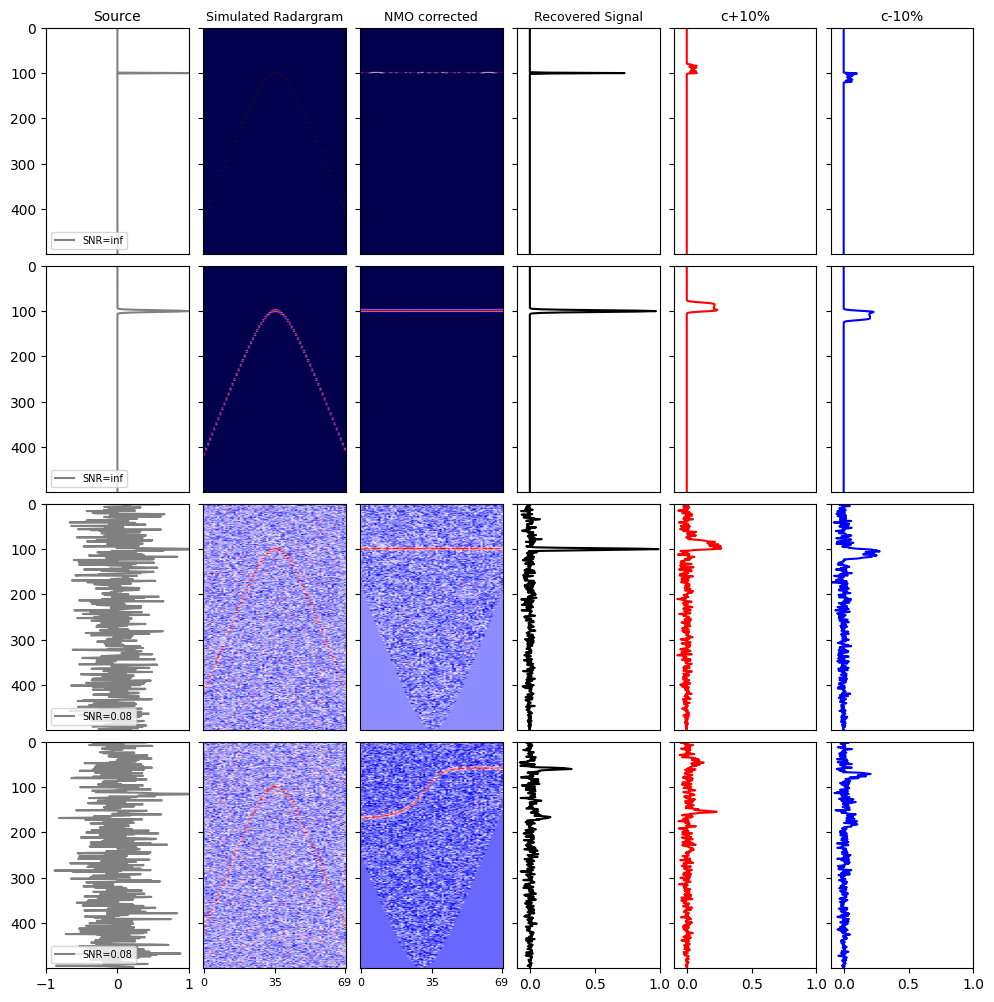

In [71]:
correct_t_0 = 100; correct_x_0 = 35; correct_eps_r = 3.0
params = {0:{'t_0':correct_t_0, 'x_0':correct_x_0, 'eps_r':correct_eps_r, 'wavetype':'spike', 'SNR':math.inf}, 
          1:{'t_0':correct_t_0, 'x_0':correct_x_0, 'eps_r':correct_eps_r, 'wavetype':'gaussian', 'SNR':math.inf}, 
          2:{'t_0':correct_t_0, 'x_0':correct_x_0, 'eps_r':correct_eps_r, 'wavetype':'gaussian', 'SNR':0.08}, 
          3:{'t_0':correct_t_0+20, 'x_0':correct_x_0-5, 'eps_r':correct_eps_r, 'wavetype':'gaussian', 'SNR':0.08}}

rf = 400e6                 # radar frequency different from pulse frequency
dt = 1e-9                  # seconds
dx = 1                     # meters
region_shape = (70, 5e-7)  # grid (x,z)
reflectors = [(35, 50e-9)]

fig, axs = plt.subplots(4, 6, figsize=(10,10), sharey=True)
fig.tight_layout()
if isinstance(axs, np.ndarray):
    grid = axs.shape
    
for i in range(grid[0]):
    # Simulate a survey
    t_0, x_0 = params[i]['t_0'], params[i]['x_0']
    eps_r = params[i]['eps_r']
    wavetype = params[i]['wavetype']
    SNR = params[i]['SNR']

    data, x_positions, t_samples = gprsim.gprsim(eps_r, rf, dt, dx, reflectors, region_shape, wavetype, SNR)
    corrected = gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt) 
    stack = stackh(corrected)

    axs[i][0].plot(data[:, x_0], range(0,len(stack)), c='gray', label=f'SNR={SNR}')
    axs[i][0].set_xlim(-1, 1)
    axs[i][0].legend(fontsize=7, loc='lower left')
    
    axs[i][1].imshow(data, aspect='auto', cmap='seismic')
    axs[i][1].set_xticks([0, 35, 69])
    for label in axs[i][1].get_xticklabels():
        label.set_fontsize(8)
    
    im = axs[i][2].imshow(corrected, aspect='auto', cmap='seismic')
    axs[i][2].set_xticks([0, 35, 69])
    for label in axs[i][2].get_xticklabels():
        label.set_fontsize(8)

    axs[i][3].plot(stack, range(0,len(stack)), label='correct velocity', c='black')
    axs[i][3].set_xlim(-0.1, 1)



    eps_r = 3.3
    stack = stackh(gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt))
    axs[i][4].plot(stack, range(0,len(stack)), label='velocity+10%', c='red')
    axs[i][4].set_xlim(-0.1, 1)


    eps_r = 2.7
    stack = stackh(gprsim.NMO_correction(data, eps_r, t_0, x_0, region_shape, dx, dt))
    axs[i][5].plot(stack, range(0,len(stack)), label='velocity-10%', c='blue')
    axs[i][5].set_xlim(-0.1, 1)

    if i != 3:
        for j in range(0, 6):
            axs[i][j].set_xticks([])
        

    
    # Making the plot pretty
    # '''
axs[0, 0].set_title('Source', fontsize=10, pad=5); axs[0, 1].set_title('Simulated Radargram', fontsize=9, pad=5); axs[0, 2].set_title('NMO corrected', fontsize=9, pad=5); axs[0, 3].set_title('Recovered Signal', fontsize=9, pad=5); axs[0, 4].set_title('c+10%', fontsize=10, pad=5);  axs[0, 5].set_title('c-10%', fontsize=10, pad=5);
plt.subplots_adjust(hspace=0.05, wspace=0.1)

plt.savefig('/Users/coltenrodriguez/desktop/Senior_Thesis/Thesis/Figures/NMO_Figure_Draft.png')
    # axs[1].set_title('NMO correction'); axs[1].set_xlabel('x distance [m]'), ; fig.colorbar(im, ax=axs[1], orientation='vertical')
    # axs[2].set_title('Recovered Signal: Stacked Traces'); axs[2].legend()
    # axs[3].set_title('c+10%'); axs[3].set_xlabel('Signal Average in the x-dimension')
    # axs[4].set_title('c-10%')

In [16]:
import numpy as np
f = 10^-4
p = 2200
L = 600000

(-f + np.sqrt(f**2 - 4*((1/L)*(3.67e-3))))/(2/L)

np.float64(5999999.999632999)

In [23]:
(-f + np.sqrt((f**2) * (1/L)*(3.67e-3)*4))/(2/L)

np.float64(3000469.254728266)